In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime

sns.set_theme(style="whitegrid")

In [2]:
stock_list = ['bbca', 'bbni', 'bumi', 'indy', 'sido']
stock_code = ['BBCA', 'BBNI', 'BUMI', 'INDY', 'SIDO']

for a, x in zip(stock_list, stock_code):
    globals()[a] = pd.read_csv(f"C:\\Users\\LENOVO\\Stocks_exploration\\{x}_23_11_2022.csv", encoding='utf-8')
    globals()[a]['Date'] = pd.to_datetime(globals()[a]['Date'])
#     globals()[a]['Open'] = globals()[a]['Open'].astype(int)
    
bbca.head()

,Date,Open,High,Low,Close,Volume
0,2020-11-23,6600.0,6610.0,6550.0,6600.0,75265500.0
1,2020-11-24,6600.0,6600.0,6545.0,6565.0,72349500.0
2,2020-11-25,6580.0,6585.0,6380.0,6410.0,170140500.0
3,2020-11-26,6350.0,6490.0,6300.0,6480.0,64339000.0
4,2020-11-27,6480.0,6490.0,6380.0,6385.0,87361500.0


In [3]:
bbca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    489 non-null    datetime64[ns]
 1   Open    489 non-null    float64       
 2   High    489 non-null    float64       
 3   Low     489 non-null    float64       
 4   Close   489 non-null    float64       
 5   Volume  489 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 23.0 KB


NameError: name 'y' is not defined

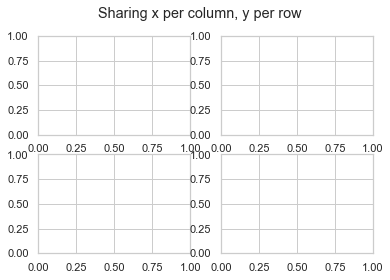

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

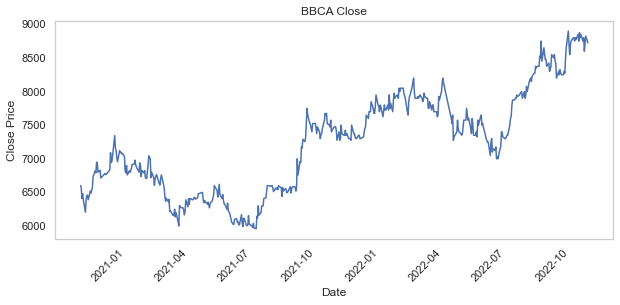

In [6]:
# plt.figure(figsize=(18,4))
# g = sns.lineplot(data=bbca,x="Date", y="Close")
# g.set_xticklabe(rotation=45)

plt.figure(figsize=(10,4))
plt.plot('Date','Close',data=bbca)
plt.grid(False)
plt.title('BBCA Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

plt.show()

In [ ]:
plt.figure(figsize=(10,4))
plt.plot('Date','Open',data=bbca)
plt.grid(False)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

plt.show()

In [ ]:
plt.figure(figsize=(10,4))
plt.plot('Date','Volume',data=bbca)
plt.grid(False)
plt.title('BBCA Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

plt.show()

In [ ]:
bbca = bbca.resample('M', on='Date').median()
bbca.tail()

In [ ]:
bbca["Bulan"] = bbca.index.month
bbca["Tahun"] = bbca.index.year

bbca_pivot = bbca.pivot("Bulan", "Tahun", "Close")

bbca_pivot.head()

In [ ]:
plt.figure(figsize=(8,6))
g = sns.heatmap(data=bbca_pivot, annot=True, fmt=".0f")

In [ ]:
# plt.rc('figure',figsize=(12,8)) #ukuran chart
# plt.rc('font',size=15)
# result = seasonal_decompose(bbca.Close,model='additive',period=60)
# fig = result.plot()


In [ ]:
# stocks_list = [BBCA, BBNI, BUMI, INDY]

In [ ]:
# plt.figure(figsize=(15, 6))
# plt.subplots_adjust(top=1.25, bottom=1.2)

# for i, company in enumerate(, 1):
#     plt.subplot(2, 2, i)
#     company['Open'].plot()
#     plt.ylabel('Open')
#     plt.xlabel(None)
#     plt.title(f"Open Price of {tech_list[i - 1]}")
    
# plt.tight_layout()

In [ ]:
file_list=['BBCA_23_11_2022.csv','BBNI_23_11_2022.csv']
  
main_dataframe = pd.DataFrame(pd.read_csv(file_list[0]))
  
for i in range(1,len(file_list)):
    data = pd.read_csv(file_list[i])
    df = pd.DataFrame(data)
    main_dataframe = pd.concat([main_dataframe,df],axis=1)
# print(main_dataframe)

df.head()

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

In [ ]:
company_list

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()